# 데이터셋 API
- 데이터 입력 파이프라인을 위한 패키지
- tf.data 패키지에서 제공
- tf.data.Dataset 추상클래스에서 상속된 여러가지 클래스 객체를 사용 또는 만들어 쓴다.

## 데이터 입력 파이프라인이란
**모델에 공급**되는 데이터에 대한 전처리 작업과 공급을 담당한다.    
- 이미지 데이터의 경우
    - 분산 파일시스템으로 부터 이미지를 모으는 작업, 
    - 이미지에 노이즈를 주거나 변형하는 작업, 
    - 배치 학습을 위해 무작위로 데이터를 선택하여 배치데이터를 만드는 작업
- 텍스트 데이터 경우
    - 원문을 토큰화하는 작업
    - 임베딩하는 작업
    - 길이가 다른 데이터를 패딩하여 합치는 작업 


## 데이터셋 API 사용 세단계
1. 데이터셋 생성
    - from_tensor_slices(), from_generator() 클래스 메소드, tf.data.TFRecordDataset 클래스를 사용해 메모리나 파일에 있는 데이터를 데이터소스로 만든다.
    - from_tensor_slices(): 리스트 넘파이배열, 텐서플로 자료형에서 데이터를 생성한다.
2. 데이터셋 변형: map(), filter(), batch() 등 메소드를 이용해 데이터 소스를 변형한다.
3. for 반복문에서 iterate를 통해 데이터셋 사용

## Dataset의 주요 메소드
- map(함수) : dataset의 각 원소들을 함수로 처리한다.
- shuffle(크기): dataset의 원소들의 순서를 섞는다. 크기는 섞는 공간의 크기로  **데이터보다 크거나 같으면** 완전셔플, **적으면 일부만 가져와서 섞어** 완전셔플이 안된다.=>데이터가 너무너무 많으면 적게 주기도 한다.)
- batch(size) : 반복시 제공할 데이터 수. 지정한 batch size만큼 data를 꺼내준다.

In [1]:
import tensorflow as tf
import numpy as np

In [15]:
arr = np.arange(9)

In [16]:
# 메모리에 ndarray로 저장된 데이터를 이용해 Dataset 객체 생성
dataset = tf.data.Dataset.from_tensor_slices(arr)
type(dataset)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [17]:
# 각각의 원소를 변환하는 작업을 Dataset에 추가 - Dataset.map(변환함수)
dataset = dataset.map(lambda x:x**2)
type(dataset)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [9]:
# dataset = dataset.filter(lambda x: x%2 == 0)  #2의 배수만 걸러내기
# def func(x):
#     return x%2 == 0

In [18]:
dataset = dataset.shuffle(9)

In [19]:
dataset = dataset.batch(3)  #한번에 지정한 개수(3)만큼 제공

In [20]:
# Dataset에서 제공되는 값들을 조회
for a in dataset:
    print(a)

tf.Tensor([36 16  0], shape=(3,), dtype=int32)
tf.Tensor([ 1 64  9], shape=(3,), dtype=int32)
tf.Tensor([25 49  4], shape=(3,), dtype=int32)


In [21]:
x = np.arange(10)
y = np.arange(10, 20)
x.shape, y.shape

((10,), (10,))

In [22]:
ds = tf.data.Dataset.from_tensor_slices((x, y))

In [24]:
for a in ds:
    print(a)
    break

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=10>)


In [25]:
ds2 = ds.map(lambda x, y: (x**2, y**3))
# def map_func(x, y):
#     return (x**2, y**3)

In [26]:
for a in ds2:
    print(a)

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=1000>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=1331>)
(<tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=1728>)
(<tf.Tensor: shape=(), dtype=int32, numpy=9>, <tf.Tensor: shape=(), dtype=int32, numpy=2197>)
(<tf.Tensor: shape=(), dtype=int32, numpy=16>, <tf.Tensor: shape=(), dtype=int32, numpy=2744>)
(<tf.Tensor: shape=(), dtype=int32, numpy=25>, <tf.Tensor: shape=(), dtype=int32, numpy=3375>)
(<tf.Tensor: shape=(), dtype=int32, numpy=36>, <tf.Tensor: shape=(), dtype=int32, numpy=4096>)
(<tf.Tensor: shape=(), dtype=int32, numpy=49>, <tf.Tensor: shape=(), dtype=int32, numpy=4913>)
(<tf.Tensor: shape=(), dtype=int32, numpy=64>, <tf.Tensor: shape=(), dtype=int32, numpy=5832>)
(<tf.Tensor: shape=(), dtype=int32, numpy=81>, <tf.Tensor: shape=(), dtype=int32, numpy=6859>)


In [27]:
ds3 = ds2.shuffle(10)

In [28]:
for a in ds3:
    print(a)

(<tf.Tensor: shape=(), dtype=int32, numpy=36>, <tf.Tensor: shape=(), dtype=int32, numpy=4096>)
(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=1000>)
(<tf.Tensor: shape=(), dtype=int32, numpy=16>, <tf.Tensor: shape=(), dtype=int32, numpy=2744>)
(<tf.Tensor: shape=(), dtype=int32, numpy=64>, <tf.Tensor: shape=(), dtype=int32, numpy=5832>)
(<tf.Tensor: shape=(), dtype=int32, numpy=25>, <tf.Tensor: shape=(), dtype=int32, numpy=3375>)
(<tf.Tensor: shape=(), dtype=int32, numpy=49>, <tf.Tensor: shape=(), dtype=int32, numpy=4913>)
(<tf.Tensor: shape=(), dtype=int32, numpy=81>, <tf.Tensor: shape=(), dtype=int32, numpy=6859>)
(<tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=1728>)
(<tf.Tensor: shape=(), dtype=int32, numpy=9>, <tf.Tensor: shape=(), dtype=int32, numpy=2197>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=1331>)


In [29]:
ds4 = ds2.batch(4)

In [30]:
for a in ds4:
    print(a)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)


In [31]:
for a in ds4.repeat():
    print(a)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, n

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, n

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, n

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, n

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,)

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, n

KeyboardInterrupt: 

In [33]:
dataset = tf.data.Dataset.from_tensor_slices((x, y)).map(lambda x, y: (x**2, y**3)).shuffle(10).batch(4).repeat(3)

In [34]:
for a in dataset:
    print(a)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 4, 36, 16, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1728, 4096, 2744, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 25,  9,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 3375, 2197, 1000])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1,  0, 25,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 1000, 3375, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([64,  9, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([5832, 2197, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([16, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2744, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1,  4, 16, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 1728, 2744, 5832])>)
(<tf.Tensor

# 1. 회귀 - Boston Housing Dataset
보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.
- CRIM: 범죄율
- ZN: 25,000 평방피트당 주거지역 비율
- INDUS: 비소매 상업지구 비율
- CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
- NOX: 일산화질소 농도(단위: 0.1ppm)
- RM: 주택당 방의 수
- AGE: 1940년 이전에 건설된 주택의 비율
- DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
- RAD: 고속도로 접근성
- TAX: 재산세율
- PTRATIO: 학생/교사 비율
- B: 흑인 비율
- LSTAT: 하위 계층 비율

예측해야하는 것
- MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
# random seed
np.random.seed(1)
tf.random.set_seed(1)

In [3]:
# 데이터셋 로딩
(X_train, y_train), (X_test, y_test) = keras.datasets.boston_housing.load_data()
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [4]:
y_train[:5]  #회귀(Regression)

array([15.2, 42.3, 50. , 21.1, 17.7])

In [5]:
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [6]:
# 하이퍼파라미터 값들을 설정
LEARNING_RATE = 0.001  #학습률
N_EPOCHS = 200  #에폭 횟수. 1 epoch: 전체 데이터셋을 한번 사용한 것
N_BATCHS = 32  #batch size. 32개 데이터셋마다 파라미터를(가중치) 업데이트

N_TRAIN = X_train.shape[0]  #train set의 개수
N_TEST = X_test.shape[0]  #test set의 개수
N_FEATURES = X_train.shape[1]  #input data의 feature(컬럼) 개수

In [7]:
# Dataset 생성
# drop_remainder=True : 마지막에 batch size보다 제공할 데이터가 적으면 학습시 제공하지 말고 버려라
# repeat() : 여러 epoch을 돌 때마다 계속 데이터를 제공하게 하기 위해서. repeat를 지정하지 않으면 1 epoch 후 제공할 데이터가 없어짐
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True).repeat()
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

In [8]:
# 모델 생성
def create_model():
    model = keras.Sequential()
    #입력 Layer를 따로 정의
    #첫번째 layer를 만들 때 input_shape(입력 데이터의 형태)를 지정하면 입력 layer층이 자동으로 생성
    model.add(keras.layers.Dense(units=16, activation='relu', input_shape=(N_FEATURES, )))
    model.add(keras.layers.Dense(units=8, activation='relu'))
    #출력 layer
    model.add(keras.layers.Dense(units=1))  #회귀의 출력층: units수는 1, activation 함수는 사용하지 않는다
    
    #모델 컴파일
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),  #optimizer의 하이퍼파라미터를 기본값으로 쓸 경우 문자열로 'adam' 선언하면 됨
                 loss='mse')  #회귀의 loss 함수: mse
    return model

In [9]:
model = create_model()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [11]:
step_per_epoch = N_TRAIN // N_BATCHS

In [12]:
validation_steps = int(np.ceil(N_TEST/N_BATCHS))

In [13]:
history = model.fit(train_dataset, #train dataset(X_train, y_train)
          epochs=N_EPOCHS,
          steps_per_epoch= step_per_epoch,  #1 epoch당 step 수
          validation_data=val_dataset,
          validation_steps=validation_steps)

Train for 12 steps, validate for 4 steps
Epoch 1/200
12/12 [==============================] - 1s 48ms/step - loss: 402.1756 - val_loss: 239.0792
Epoch 2/200
12/12 [==============================] - 0s 4ms/step - loss: 151.8999 - val_loss: 120.9074
Epoch 3/200
12/12 [==============================] - 0s 4ms/step - loss: 81.3070 - val_loss: 104.4386
Epoch 4/200
12/12 [==============================] - 0s 4ms/step - loss: 77.1330 - val_loss: 99.5287
Epoch 5/200
12/12 [==============================] - 0s 3ms/step - loss: 73.2870 - val_loss: 102.3875
Epoch 6/200
12/12 [==============================] - 0s 3ms/step - loss: 73.6594 - val_loss: 96.8372
Epoch 7/200
12/12 [==============================] - 0s 4ms/step - loss: 68.5961 - val_loss: 105.7052
Epoch 8/200
12/12 [==============================] - 0s 5ms/step - loss: 68.1735 - val_loss: 96.7148
Epoch 9/200
12/12 [==============================] - 0s 4ms/step - loss: 64.4891 - val_loss: 99.6242
Epoch 10/200
12/12 [======================

Epoch 81/200
12/12 [==============================] - 0s 3ms/step - loss: 40.6395 - val_loss: 53.9089
Epoch 82/200
12/12 [==============================] - 0s 3ms/step - loss: 41.8409 - val_loss: 63.6541
Epoch 83/200
12/12 [==============================] - 0s 3ms/step - loss: 41.3783 - val_loss: 53.3382
Epoch 84/200
12/12 [==============================] - 0s 3ms/step - loss: 39.6774 - val_loss: 55.3795
Epoch 85/200
12/12 [==============================] - 0s 3ms/step - loss: 41.2063 - val_loss: 53.4620
Epoch 86/200
12/12 [==============================] - 0s 3ms/step - loss: 40.0407 - val_loss: 50.9151
Epoch 87/200
12/12 [==============================] - 0s 3ms/step - loss: 35.3876 - val_loss: 57.0341
Epoch 88/200
12/12 [==============================] - 0s 3ms/step - loss: 40.0828 - val_loss: 55.3768
Epoch 89/200
12/12 [==============================] - 0s 3ms/step - loss: 41.4325 - val_loss: 53.9549
Epoch 90/200
12/12 [==============================] - 0s 3ms/step - loss: 36.9179 

In [14]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [15]:
history.history

{'loss': [402.1755714416504,
  151.8999080657959,
  81.30701160430908,
  77.13301118214925,
  73.28703467051189,
  73.65941619873047,
  68.59605550765991,
  68.17346239089966,
  64.48908138275146,
  64.8098824818929,
  65.43766578038533,
  62.97398026784261,
  63.70985635121664,
  65.03363641103108,
  63.968371550242104,
  62.03939040501913,
  62.409614404042564,
  59.52605644861857,
  61.34282080332438,
  58.386757691701256,
  59.823924700419106,
  60.44420623779297,
  57.643933137257896,
  58.558788458506264,
  55.61461035410563,
  55.175479571024574,
  56.72218449910482,
  55.2426438331604,
  56.00656016667684,
  55.081990242004395,
  54.414416472117104,
  53.56959597269694,
  51.94300206502279,
  50.852795441945396,
  52.05717945098877,
  56.36387538909912,
  58.05383268992106,
  55.84691349665324,
  50.77808666229248,
  50.52508211135864,
  50.231220960617065,
  51.10897922515869,
  47.1106162071228,
  46.91719579696655,
  49.16593964894613,
  49.584521770477295,
  49.956803957621

In [16]:
history.history['val_loss']

[239.07921409606934,
 120.90739154815674,
 104.43864727020264,
 99.52873229980469,
 102.38753890991211,
 96.83716106414795,
 105.70520973205566,
 96.71477127075195,
 99.62417411804199,
 94.79558277130127,
 93.51691913604736,
 92.28505611419678,
 90.681396484375,
 90.34867191314697,
 90.38856506347656,
 88.61078262329102,
 93.47032928466797,
 85.18064308166504,
 86.07576370239258,
 86.59419918060303,
 83.04612731933594,
 81.00098419189453,
 86.80790615081787,
 80.00780963897705,
 80.80056667327881,
 86.52716541290283,
 76.9068832397461,
 80.47087955474854,
 76.23849487304688,
 81.33969497680664,
 74.79212665557861,
 79.9434871673584,
 74.42268657684326,
 74.46122074127197,
 72.39503479003906,
 75.09574317932129,
 72.71757221221924,
 85.84942531585693,
 71.20319080352783,
 69.44615173339844,
 71.20471668243408,
 72.69189643859863,
 69.04610443115234,
 68.45055294036865,
 67.5604362487793,
 66.64585781097412,
 67.44141960144043,
 66.82737159729004,
 67.03874111175537,
 64.61459159851074,


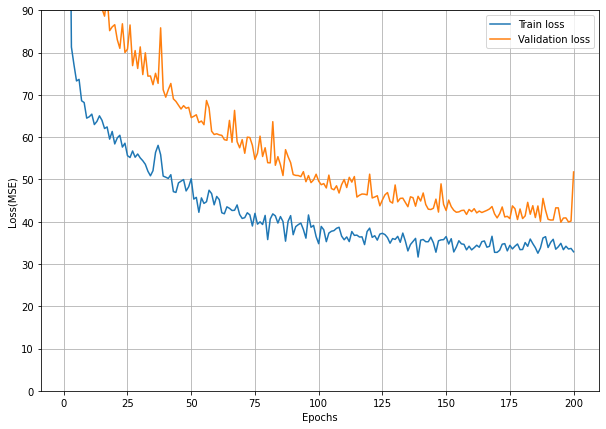

In [17]:
#epoch당 loss와 val_loss 변화에 대해 선그래프 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(1, N_EPOCHS+1), history.history['loss'], label='Train loss')
plt.plot(range(1, N_EPOCHS+1), history.history['val_loss'], label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss(MSE)')
plt.ylim(0, 90)
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# 평가
model.evaluate(val_dataset)  #

4/4 [==============================] - 0s 4ms/step - loss: 51.7618


51.76176357269287

## 2. Classification

### Fashion MNIST(MNIST) Dataset

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋. 
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목을 나타낸다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

패션 MNIST와 손글씨 MNIST는  비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용되곤 하며 코드를 테스트하고 디버깅하는 용도로 좋다.

이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이이다. *레이블*(label)은 0에서 9까지의 정수 배열이다. 아래 표는 이미지에 있는 의류의 **클래스**(class)를 나낸다.

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있다. 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장한다.

In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [20]:
pred = 2
class_names[pred]

'Pullover'

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

np.random.seed(1)
tf.random.set_seed(1)

In [23]:
# 데이터셋 읽기
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [26]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

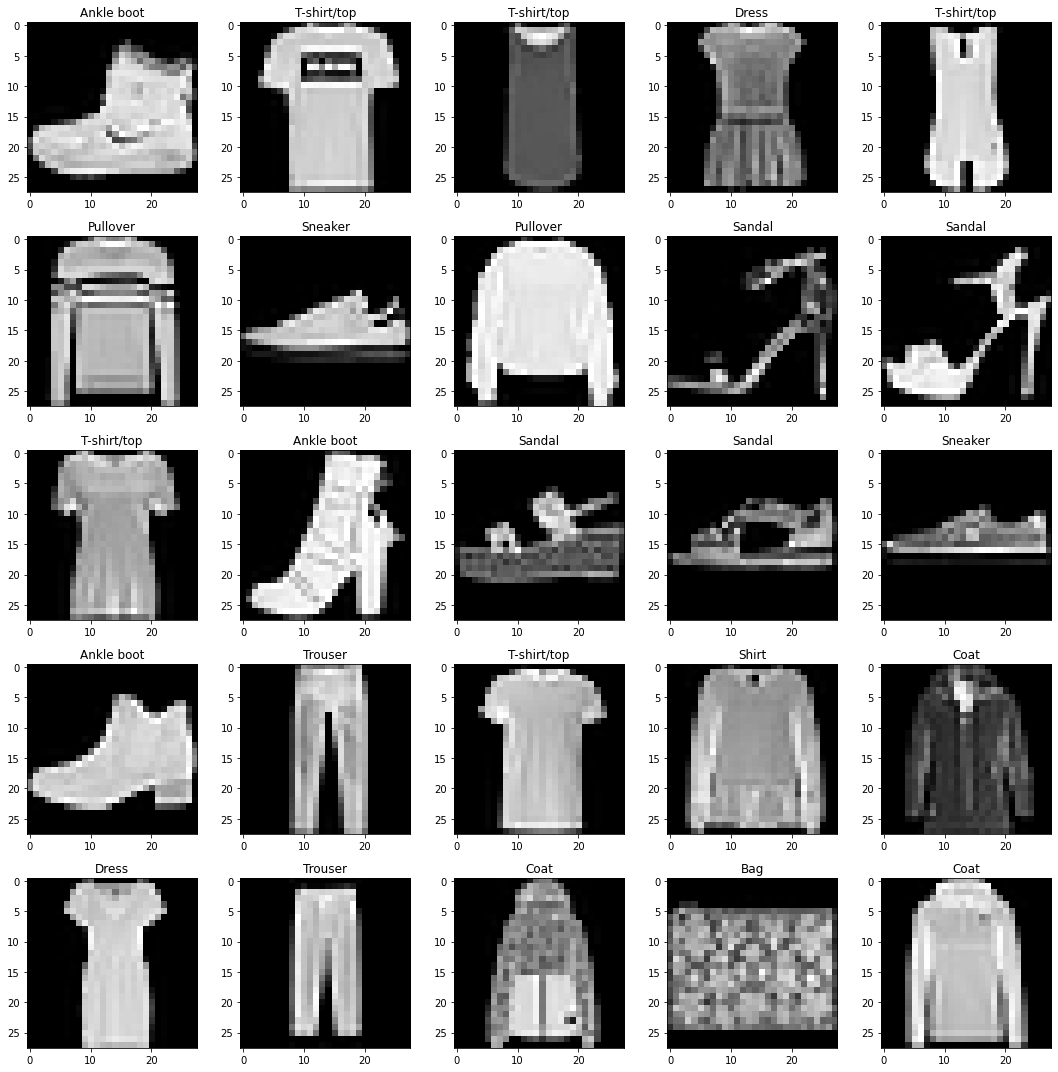

In [28]:
# 이미지 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])

plt.tight_layout()
plt.show()

In [34]:
# 하이퍼파라미터 설정
LEARNING_RATE = 0.001
N_EPOCHS = 50
N_BATCHS = 100

N_CLASS = 10  #CLASS CATEGORY의 개수
N_TRAIN = X_train.shape[0]
N_TEST = X_test.shape[0]
IMAGE_SIZE = 28

In [30]:
# 데이터 전처리
# X(이미지) : 0 ~ 255
X_train = X_train/255
X_test = X_test/255

# Y(Label) => 다중분류: OneHotEncoding
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [31]:
np.max(X_train), np.min(X_train)

(1.0, 0.0)

In [32]:
y_test.shape

(10000, 10)

In [33]:
y_test[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# Dataset
train_dataset = tf.data.Dattaset.from_tensor_slices((X_train, y_train))\
                                .shuffle(N_TRAIN)\
                                .batch(N_BATCHS, drop_remainder=True)\
                                .repeat()

In [35]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

In [40]:
# 모델 구현
def create_model():
    model = keras.Sequential()
    
    #입력층(Input Layer)
    model.add(keras.layers.Input((28,28)))
    model.add(keras.layers.Flatten())
    
    #은닉층(Hidden Layer)
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(64, activation='relu'))
    
    #출력층(Output Layer)
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))  #다중분류: units-class category 개수, activation: softmax => 각 class별 확률
    
    #컴파일, 다중분류: loss-categorical_crossentropy(y가 ohe된 경우), sparse_categorical_entropy(y가 ohe안 된 경우)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [42]:
model = create_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


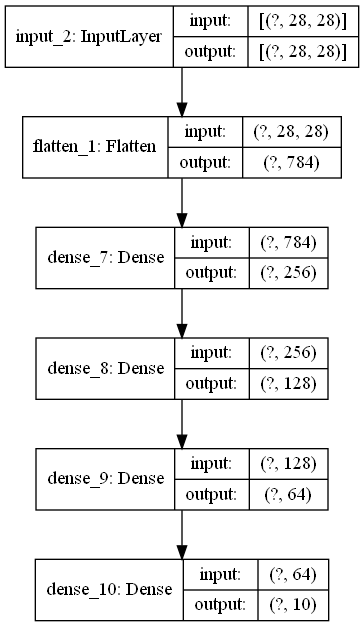

In [43]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='fashion_mnist_model.png', show_shapes=True)

In [39]:
# 학습

## steps 계산
steps_per_epoch = N_TRAIN // N_BATCHS
validation_steps = int(np.ceil(N_TEST / N_BATCHS))
print(steps_per_epoch, validation_steps)

600 100


In [44]:
## 학습
history = model.fit(train_dataset,
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_dataset,
                    validation_steps=validation_steps)

ValueError: in converted code:

    C:\Users\Playdata\Anaconda3\envs\tf2\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py:677 map_fn
        batch_size=None)
    C:\Users\Playdata\Anaconda3\envs\tf2\lib\site-packages\tensorflow_core\python\keras\engine\training.py:2410 _standardize_tensors
        exception_prefix='input')
    C:\Users\Playdata\Anaconda3\envs\tf2\lib\site-packages\tensorflow_core\python\keras\engine\training_utils.py:573 standardize_input_data
        'with shape ' + str(data_shape))

    ValueError: Error when checking input: expected input_2 to have 3 dimensions, but got array with shape (32, 13)


In [45]:
# 평가 - test set (마지막에 한번)
model.evaluate(val_dataset)

100/100 [==============================] - 1s 5ms/step - loss: 2.3594 - accuracy: 0.0785


[2.359439136981964, 0.0785]

In [ ]:
# 결과 시각화 (loss와 지정한 평가지표의 epoch당 변화를 시각화) => 선 그래프

In [46]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

ValueError: x and y must have same first dimension, but have shapes (50,) and (200,)

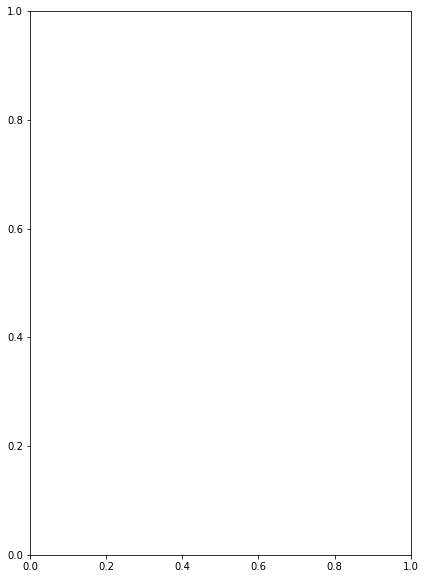

In [47]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.plot(range(1, N_EPOCHS+1), history.history['loss'], label='train loss')
plt.plot(range(1, N_EPOCHS+1), history.history['val_loss'], label='validation loss')
plt.title('LOSS')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1, N_EPOCHS+1), history.history['accuracy'], label='train accuracy')
plt.plot(range(1, N_EPOCHS+1), history.history['val_accuracy'], label='validation accuracy')
plt.title('ACCURACY')

plt.legend()
plt.tight_layout()
plt.show()

## IMDB 감성분석

### 이진분류(Binary Classification)
- 영화 댓글 : 부정(0)/긍정(1)

In [28]:
import pickle

#데이터 로드
with open('imdb_dataset/x_train.pkl', 'rb') as f:
    X_train = pickle.load(f)
    
with open('imdb_dataset/x_test.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('imdb_dataset/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('imdb_dataset/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

In [32]:
# X -> 벡터화(숫자 변경)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=10000)
tfidf.fit(X_train+X_test)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [33]:
X_train_tfidf.shape

(25000, 10000)

In [34]:
X_train_tfidf

<25000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2055897 stored elements in Compressed Sparse Row format>

In [35]:
y_train.shape

(25000,)

In [36]:
#하이퍼파라미터 설정
LEARNING_RATE = 0.001
N_EPOCHS = 10
N_BATCHS = 100

N_TRAIN = X_train_tfidf.shape[0]
N_TEST = X_test_tfidf.shape[0]
N_FEATURE = X_train_tfidf.shape[1]

In [37]:
import tensorflow as tf
# Dataset 생성 - Y: 이진분류 - one hot encoding 필요X
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tfidf.toarray(), y_train))\
                               .shuffle(N_TRAIN)\
                               .batch(N_BATCHS, drop_remainder=True)\
                               .repeat()

val_dataset = tf.data.Dataset.from_tensor_slices((X_test_tfidf.toarray(), y_test)).batch(N_BATCHS)

In [38]:
def create_model():
    model = keras.Sequential()
    
    #input Layer
    model.add(keras.layers.Input((N_FEATURE, )))
    
    #Hidden Layer
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    
    #Output Layer: 이진분류: units=1, activation='sigmoid': Logistic 함수
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    #컴파일: 이진분류 - activation='sigmoid' => Loss: binary_crossentropy
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [40]:
from tensorflow import keras
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5120512   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 5,350,657
Trainable params: 5,350,657
Non-trainable params: 0
_________________________________________________________________


In [41]:
plot_model(model, show_shapes=True)

NameError: name 'plot_model' is not defined

In [44]:
import numpy as np
# 학습
steps_per_epoch = N_TRAIN // N_BATCHS
validation_steps = int(np.ceil(N_TEST/N_BATCHS))
steps_per_epoch, validation_steps

(250, 250)

In [45]:
history = model.fit(train_dataset,
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_dataset,
                    validation_steps=validation_steps)

Train for 250 steps, validate for 250 steps
Epoch 1/10
250/250 [==============================] - 52s 206ms/step - loss: 0.3382 - accuracy: 0.8539 - val_loss: 0.3350 - val_accuracy: 0.8546
Epoch 2/10
250/250 [==============================] - 53s 214ms/step - loss: 0.1472 - accuracy: 0.9444 - val_loss: 0.4189 - val_accuracy: 0.8396
Epoch 3/10
250/250 [==============================] - 54s 215ms/step - loss: 0.0406 - accuracy: 0.9857 - val_loss: 0.6554 - val_accuracy: 0.8425
Epoch 4/10
250/250 [==============================] - 50s 199ms/step - loss: 0.0083 - accuracy: 0.9978 - val_loss: 0.9896 - val_accuracy: 0.8434
Epoch 5/10
250/250 [==============================] - 53s 213ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 1.2267 - val_accuracy: 0.8364
Epoch 6/10
250/250 [==============================] - 51s 204ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 1.3860 - val_accuracy: 0.8435
Epoch 7/10
250/250 [==============================] - 54s 217ms/step - loss: 3.8317e-0

In [46]:
# 평가
model.evaluate(val_dataset)

250/250 [==============================] - 7s 29ms/step - loss: 0.8399 - accuracy: 0.8358


[0.839942617893219, 0.8358]

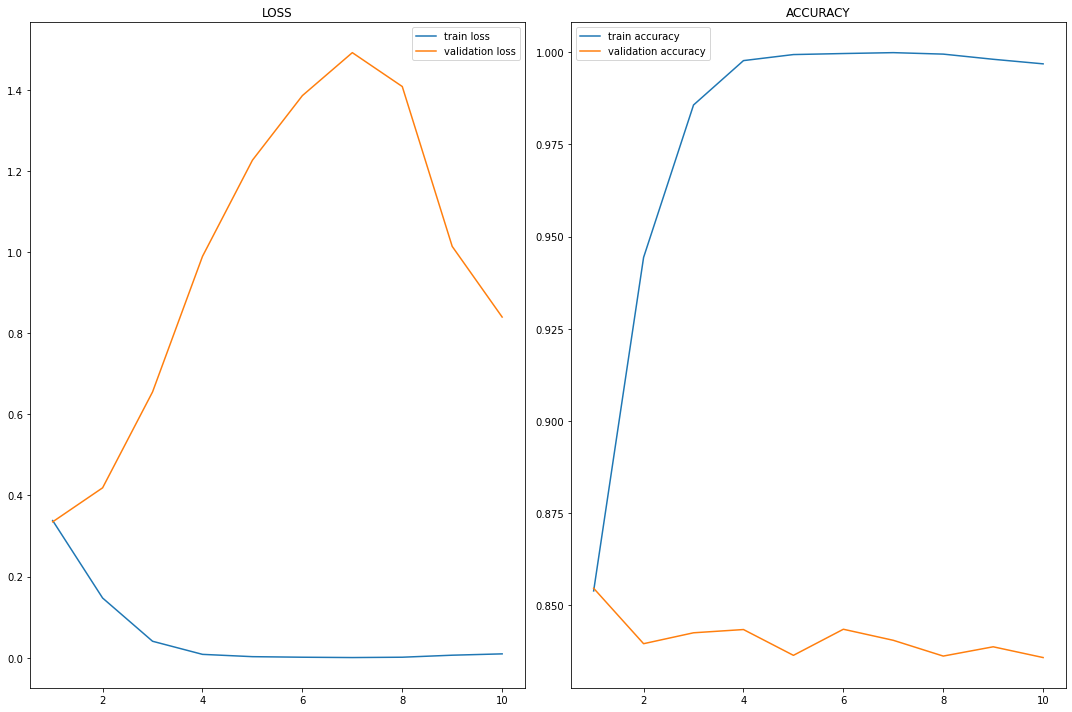

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.plot(range(1, N_EPOCHS+1), history.history['loss'], label='train loss')
plt.plot(range(1, N_EPOCHS+1), history.history['val_loss'], label='validation loss')
plt.title('LOSS')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1, N_EPOCHS+1), history.history['accuracy'], label='train accuracy')
plt.plot(range(1, N_EPOCHS+1), history.history['val_accuracy'], label='validation accuracy')
plt.title('ACCURACY')

plt.legend()
plt.tight_layout()
plt.show()